Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Vinicius Julião Ramos"
COLLABORATORS = ""

---

# Aula 05 - Gradiente Descendente

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.ion()

# Exercício 01:

Atualmente, uma das teorias mais aceitas sobre a formação do universo, diz que o universo está em constante expansão.

Supernovas são estrelas que explodiram e morreram recentemente. A base inclusa na pasta desta lista contém registros dessas supernovas. Cada linha na tabela corresponde a uma supernova próxima da Terra observada por astrônomos, indicando o quão longe da Terra a supernova estava e o quão rápido ela se afastava.

Neste exercício, vamos encontrar valores para os parâmetros de uma reta que aproxime a velocidade a partir da distância, usando a base ```close_novas.csv```, por meio do gradiente descendente. Ou seja, uma regressão linear.

A figura abaixo mostra um pouco, de forma bem bem simples, a ideia do big bang.

![](./bang.png)

In [3]:
df = pd.read_csv('./close_novas.csv')
df.head()

,Distance (million parsecs),Speed (parsecs/year)
0,117.305042,0.008734
1,217.006920,0.015342
2,230.960787,0.016226
3,85.285262,0.005281
4,185.051202,0.012947


Text(0, 0.5, 'Speed (parsecs/year)')

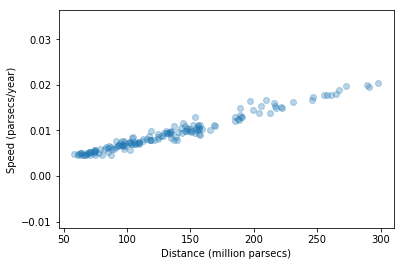

In [4]:
plt.scatter(df.values[:, 0], df.values[:, 1], alpha=0.3) # Esse alpha define transparência dos pontos
plt.xlabel('Distance (million parsecs)')
plt.ylabel('Speed (parsecs/year)')

O resultado de uma regressão nos dados acima pode ser utilizada para estimar a idade do universo. Para entender como podemos fazer isso, vamos dar um exemplo. Um carro com alguns colegas seus partiu do ICEx. Um carro partiu da sua localização com uma velocidade de 80 km/h. Depois um tempo, um conhecido seu que está dentro do carro liga para você indicando que os passageiros já percorreram 160km. Com base nesta resposta, você consegue estimar que seus colegas partiram do ICEx 2h atrás.

A mesma ideia acima é utilizada para estimar a idade do universo. Cada supernova está viajando com uma velocidade razoavelmente constante. Podemos assumir que todas as estrelas partiram de um mesmo local, afinal o vetor da trajetória também é razoavelmente constante. Agora, obviamente não observamos as estrelas do local do big bang. Estamos mensurando a velocidade das mesmas e a distância em relação ao planeta Terra.

Um fator interessante é que a correlação não muda ao somar uma constante nos eixos. Lembre-se da z-normalização. A dispersão abaixo captura a mesma tendência da dispersão acima. 

Text(0, 0.5, 'Speed (parsecs/year)')

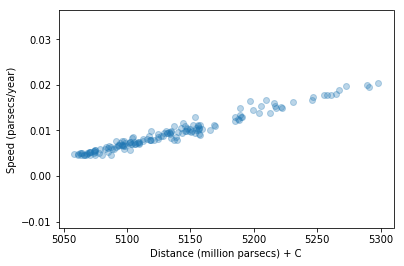

In [5]:
C = 5000 # constante
plt.scatter(df.values[:, 0] + C, df.values[:, 1], alpha=0.3)
plt.xlabel('Distance (million parsecs) + C')
plt.ylabel('Speed (parsecs/year)')

Agora, pense em uma regressão linear como uma média de linhas. Para cada linha, temos a fórmula:

$$y_i = \beta x_i + \alpha$$

Partindo de uma origem (0, 0), cada linha é definida por $\Delta_y/\Delta_x$. Neste caso, temos que $\alpha=0$ e $\beta=(y-0)/(x-0)$, ou $y/x$. 

Nos seus dados da supernova, y é a velocidade e x é a distância. Sabendo também que a correlação não muda quando adicionamos uma constante nos dados, podemos estimar a idade do universo observando os dados a partir do planeta Terra. Assumindo que todas as supernovas partiram de uma mesma origem, temos que $\Delta_y/\Delta_x$ = ${parsecs \over time} * {1.0\over 1M*parsecs}$ = ${1 \over 1M time}$. Então: 1.0/$\beta$ = 1M time.


Sabendo da informação acima, vamos brincar um pouco com a regressão linear. Inicialmente, vamos estimar a reta:

$$y_i = \beta x_i + \alpha$$

fazendo uso de gradiente descendente.

A) Para ajudar no algoritmo, z-normalize seus dados.

Text(0, 0.5, 'Speed (parsecs/year)')

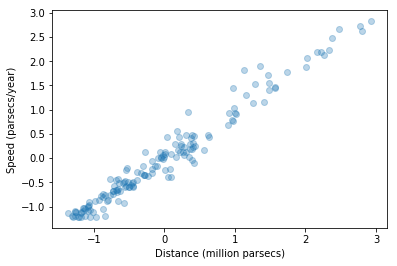

In [6]:
# YOUR CODE HERE
# raise NotImplementedError()
from numpy.testing import *

std_x = df.values[:, 0].std(ddof=1)
std_y = df.values[:, 1].std(ddof=1)
mean_x = df.values[:, 0].mean()
mean_y = df.values[:, 1].mean()

df.values[:,0] = (df.values[:,0] - mean_x)/std_x
df.values[:,1] = (df.values[:,1] - mean_y)/std_y

plt.scatter(df.values[:, 0], df.values[:, 1], alpha=0.3)
plt.xlabel('Distance (million parsecs)')
plt.ylabel('Speed (parsecs/year)')

B) Implemente a função de perda para um ponto, retornando o erro quadrático.

In [7]:
def loss_um_ponto(x_i, y_i, alpha, beta):
    # YOUR CODE HERE
#     raise NotImplementedError()
    return (y_i - (beta*x_i) - alpha)**2

In [8]:
assert_almost_equal(loss_um_ponto(118, 0.009, 0, 0.1), 139.027681, 2)

C) Implemente a função de gradiente para um ponto, retornando uma lista com os valores dos gradientes para alpha e beta, nessa ordem.

In [16]:
def gradient(x_i, y_i, alpha, beta):
    # YOUR CODE HERE
#     raise NotImplementedError()
    pre_derivada = -2 * (y_i - (beta * x_i) - alpha)
    return [pre_derivada, pre_derivada * x_i]

In [17]:
assert_almost_equal(gradient(230.960787, 0.016226, 0, 0.1), [46.15971, 10661.08189], 2)

D) Implemente a função de gradiente descendente para os parâmetros alpha e beta da regressão linear, utilizando as duas funções criadas anteriormente. 

Retorne uma lista com os valores de alpha (intercepto) e beta (inclinação), nessa ordem.

__Dica:__ obtenha os gradientes para cada ponto, some gradientes para cada parâmetro (alpha e beta), e só então atualize os valores de acordo com a taxa de aprendizado.

In [21]:
def descent(x, y, param, lambda_=0.0001, niter=1000):
    # x,y : dados
    # param : lista com valores iniciais para alpha e beta
    # lambda_ : taxa de aprendizado
    # niter : número de iterações do gradiente descendente
    # YOUR CODE HERE
#     raise NotImplementedError()
    n_ = 1/len(x)
    sqr_err = np.inf
    tol = 0.000001
    for _ in range(niter):
        alpha = 0.0
        beta = 0.0
        error = 0.0
        for x_i, y_i in zip(x, y):
            alpha_ax, beta_ax = gradient(x_i, y_i, param[0], param[1])
            error = error + loss_um_ponto(x_i, y_i, param[0], param[1])
            alpha = alpha + alpha_ax
            beta = beta + beta_ax
        param[0] = param[0] - (lambda_*alpha)
        param[1] =  param[1] - (lambda_*beta)
        error = error*n_
        if abs(sqr_err - error) < tol: break
        sqr_err = error
    return [param[0], param[1]]

E) Até o momento, vocês implementaram um grandiente descendente calculando o gradiente um ponto de cada vez.
Em python, essa não é a forma mais eficiente de se fazer isso.

Implementem uma nova versão da função de gradiente descendente, dessa vez realizando as operações de forma vetorial, ao invés de um ponto de cada vez. Tentem verificar se houve diferença de tempo de execução entre as duas versões.

In [24]:
def descent_vec(x, y, param, lambda_=0.0001, niter=1000):
    # x,y : dados
    # param : lista com valores iniciais para alpha e beta
    # lambda_ : taxa de aprendizado
    # niter : número de iterações do gradiente descendente
    # YOUR CODE HERE
    n_ = 1/len(x)
    sqr_err = np.inf
    tol = 0.000001
    for i in range(niter):
        alpha_vec, beta_vec = gradient(x, y, param[0], param[1])
        error = loss_um_ponto(x, y, param[0], param[1])*n_
        param[0] = param[0] - lambda_*(alpha_vec.sum())
        param[1] =  param[1] - lambda_*(beta_vec.sum())
        error = error.sum()*n_
        if abs(sqr_err - error) < tol: break
        sqr_err = error
    return [param[0], param[1]]

F) Vamos visualizar o modelo de regressão obtido. Utilizando a função abline abaixo, gere um gráfico com a reta de regressão linear sobre os pontos dos dados (como feito na introdução da lista).

In [25]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

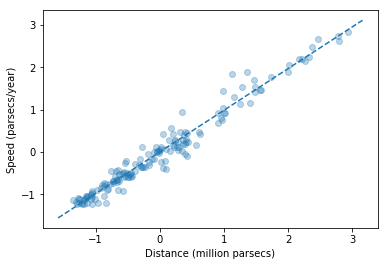

In [26]:
def plot_regression(x, y, param, lambda_, niter):
    # x,y : dados
    # param : lista com valores iniciais para alpha e beta
    # lambda_ : taxa de aprendizado
    # niter : número de iterações do gradiente descendente
    # YOUR CODE HERE
#     raise NotImplementedError()
    intercept, slope = descent(x, y, param, lambda_, niter)
    plt.scatter(x, y, alpha=0.3)
    plt.xlabel('Distance (million parsecs)')
    plt.ylabel('Speed (parsecs/year)')
    abline(slope, intercept)
    
plot_regression(df.values[:, 0], df.values[:, 1], [1, 1], 0.0001, 1000)

G) Agora vamos tentar avaliar o modelo de regressão linear obtido com o gradiente descendente.

Primeiro implementem uma função que calcule o valor da soma total dos quadrados (SST) a partir dos dados.

In [27]:
def sst(y):
    # YOUR CODE HERE
#     raise NotImplementedError()
    y_ = y.mean()
    return ((y - y_)**2).sum()

H) Para calcular a soma total de erros (SSE), primeiro precisamos ter uma previsão para os valores de
 velocidade das supernovas.
Implementem uma função que obtenha os valores previstos de velocidade a partir da distância, de acordo com o modelo de regressão linear (alpha e beta).

A função deve retornar uma lista com os valores previstos.

In [28]:
def predict(x, param):
    # x : array de distancias das supernovas
    # param : lista com os valores dos parâmetros alpha e beta
    # YOUR CODE HERE
#     raise NotImplementedError()
    return (param[1]*x + param[0])

In [29]:
assert_almost_equal(predict(df.values[:, 0], [0, 0.3]), [-0.0909056144659663, 0.44477928230180896, 0.5197515492796703, -0.26294361929371685, 0.2730854688538399, 0.42239409655982557, 0.09404183413827401, -0.2773063441736241, -0.16223767065932634, -0.05075591995385829, 0.3844369784551902, -0.02893486579797431, -0.3752213300203175, -0.39125976282353364, -0.0131341802841416, -0.16929562988628075, -0.19156976514035776, -0.08487501271414857, 0.47151444651845725, -0.15609628714778917, -0.3659156274630061, 0.11503779205199374, 0.2941623734235163, -0.21905780807224762, 0.06299869810975225, -0.3794343132458277, -0.3449225716658379, 0.003511653687419783, -0.19033021122426866, -0.3526463495680365, -0.16229506114881334, 0.18467252643821191, -0.1954810597908611, -0.3240102367292928, 0.03038339245428043, -0.14023718572506746, -0.38173886864403955, 0.33928874236282514, -0.3175613504675365, -0.16027475610390865, -0.3389262464376906, 0.11956213454682112, -0.3240032661383239, -0.35565358551987847, 0.6004090843320357, 0.27214062697972224, 0.6488664054277496, 0.10315915117783496, 0.286534281396861, -0.37951563740222705, -0.19681726901464588, -0.3538799306681907, 0.12523886176430693, -0.3408465836347297, -0.004089292638135936, -0.20532877634253124, -0.40846999156796837, -0.2303214512050899, -0.003609779479297456, -0.03842256486605544, -0.33933119298806846, 0.12188319509463055, 0.013442004753464411, -0.11660696240533205, 0.1274620676317496, -0.3034774931483835, -0.17179858062790576, -0.24078611206208703, 0.015292170114877405, 0.07123050979116008, 0.4063331912344901, -0.13847237691424805, 0.13249011712399858, 0.07057808702303629, -0.08687739842335913, -0.2616020360185081, 0.09054766430664903, -0.20280948273617924, 0.08456855071183877, 0.10813493622048305, 0.3028279420579888, 0.6792471007627409, -0.2707039006136908, 0.29067198110134107, -0.08075022511540958, -0.07044150342547317, -0.17515959195505382, 0.8331635894656486, -0.13289617653940544, 0.003989187410550945, -0.2002711967051891, 0.02741429491762194, 0.06014176938847084, -0.003371995055774397, 0.16811204429032622, 0.2992318976292177, -0.2516617333229325, -0.212270727873725, 0.47071197646357854, 0.10263883461864924, -0.2452414178699737, 0.04801947420462719, -0.22040611326400286, 0.02220309573642892, 0.12017203909848981, -0.23218293698033948, -0.3442759206072561, 0.18971982855178723, -0.13249231372378883, 0.6996385974754016, 0.6651506870951504, 0.002968189376030204, 0.440463152977247, -0.015003794304964823, 0.1078400409017658, -0.16611682268983038, -0.31737525355802837, 0.08102222735008316, 0.7420395163755149, 0.0650504785683417, -0.2525877887091116, -0.21997792928283275, -0.01663016956271189, -0.2892720344982602, -0.29604311763742225, -0.09757186636057358, 0.053735904489284336, -0.20481943107175604, -0.13492087561580038, 0.11918775593324404, -0.14846456422035909, 0.08565211766669185, -0.3643178631992688, 0.0449574736704486, -0.19653031186602396, -0.31831715465570254, -0.05376350446845823, -0.08168308104763175, -0.052363554913015135, 0.3481034093621395, -0.318863468549918, -0.17077947696826695, -0.38985247166166814, -0.029600581976744627, 0.37602838683426754, 0.11785806000060675, -0.2625057743628351, -0.14971415201328725, -0.11549981211972346, -0.32290686830580423, 0.44664205169059845, 0.6060126268640328, 0.8397994200268759, 0.2962945380799401, 0.712354005018137, 0.8806993194005831], 2)

I) Agora implemente a função de cálculo da soma total de erros (SSE).

In [38]:
def sse(x, y, param):
    # x : array de distancias das supernovas
    # y : array de velocidades das supernovas
    # param : lista com os valores dos parâmetros alpha e beta
    # YOUR CODE HERE
#     raise NotImplementedError()
    return ((y - predict(x, param))**2).sum()

In [39]:
assert_almost_equal(sse(df.values[:, 0], df.values[:, 1],[1, 1]), 161.54718123804486, 2)

J) Finalmente, implemente a função que calcula o coeficiente de determinação (R2).

Avalie se o valor de R2 obtido condiz com a qualidade do modelo observada no gráfico da regressão gerado na questão (F).

In [40]:
def r2(x, y, param):
    # x : array de distancias das supernovas
    # y : array de velocidades das supernovas
    # param : lista com os valores dos parâmetros alpha e beta
    # YOUR CODE HERE
#     raise NotImplementedError()
    return 1 - (sse(x,y, param)/sst(y))

K) Com os resultados acima, compute a idade do universo. Estime a mesma em bilhões de anos. Deve ser algo perto de 13 ou 14 a resposta. Você tem que usar os dados não normalizados. Use o valor de $\beta$ da regressão. Lembre-se que:

$\beta = {r_{xy} s_y \over s_x}$

Os desvios são não normalizados. O r pode ser o mesmo que você achou antes. Lembre-se que: a correlação é invariante nas operações de translação e escala (normalização). Porém, a unidade do beta nos dados normalizados não é a mesma dos dados originais. O beta nos dados originais, estimado com a equação acima, corrige isto.

In [42]:
df = pd.read_csv('./close_novas.csv')
x = df.values[:, 0]
y = df.values[:, 1]

In [47]:
def idade_universo(sd_x, sd_y):
    # YOUR CODE HERE
#     raise NotImplementedError()
    r_xy = np.corrcoef(x, y)[0, 1]
    param = descent_vec(x,y ,[1, 1])
    alpha = param[0]
    beta = r_xy*sd_y/sd_x
    
    #calcular a velocidade no inicio do universo
    inicio_universo = beta*0 + alpha
    
    #calcular a velocidade no dia atual
    distancia_atual = x.max()
    dias_atuais = beta*distancia_atual + alpha
    
    age_univ = distancia_atual/dias_atuais
    return (1000000 * 1/ age_univ) / 1e9

idade_universo(x.std(), y.std())

/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()
/Users/vrjuliao/programs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  


nan